<a href="https://colab.research.google.com/github/colbyenbody/crypto_price_forecaster/blob/main/price_forecaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
from google.colab import files
import matplotlib.dates as mdates

In [4]:
files.upload()

Saving btcusd.csv to btcusd.csv


{'btcusd.csv': b'date,open,high,low,close,Volume,Name\r\n6/6/2021,35538.60938,36436.42188,35304.57813,35862.37891,28913440585,BTC\r\n6/7/2021,35835.26563,36790.57031,33480.64063,33560.70703,33683936663,BTC\r\n6/8/2021,33589.51953,34017.38672,31114.44336,33472.63281,49902050442,BTC\r\n6/9/2021,33416.97656,37537.37109,32475.86523,37345.12109,53972919008,BTC\r\n6/10/2021,37389.51563,38334.32422,35847.59375,36702.59766,43576032854,BTC\r\n6/11/2021,36697.03125,37608.69531,36044.44922,37334.39844,38699736985,BTC\r\n6/12/2021,37340.14453,37408.92578,34728.19141,35552.51563,37924228550,BTC\r\n6/13/2021,35555.78906,39322.78125,34864.10938,39097.85938,40669112838,BTC\r\n6/14/2021,39016.96875,40978.36328,38757.28516,40218.47656,43148914673,BTC\r\n6/15/2021,40427.16797,41295.26953,39609.46875,40406.26953,46420149185,BTC\r\n6/16/2021,40168.69141,40516.77734,38176.03516,38347.0625,39211635100,BTC\r\n6/17/2021,38341.42188,39513.67188,37439.67578,38053.50391,37096670047,BTC\r\n6/18/2021,38099.47656,38

In [5]:
df = pd.read_csv('btcusd.csv')
df.head()

,date,open,high,low,close,Volume,Name
0,6/6/2021,35538.60938,36436.42188,35304.57813,35862.37891,28913440585,BTC
1,6/7/2021,35835.26563,36790.57031,33480.64063,33560.70703,33683936663,BTC
2,6/8/2021,33589.51953,34017.38672,31114.44336,33472.63281,49902050442,BTC
3,6/9/2021,33416.97656,37537.37109,32475.86523,37345.12109,53972919008,BTC
4,6/10/2021,37389.51563,38334.32422,35847.59375,36702.59766,43576032854,BTC


In [6]:
#Rename "Name" column to "Ticks"

df = df.rename(columns={'Name': 'Ticks'})


In [13]:
#select btc incase of multiple cryptos

btc_df = df.loc[df['Ticks'] == 'BTC']

In [14]:
# Change to datetime datatype.
btc_df.loc[:, 'date'] = pd.to_datetime(btc.loc[:,'date'], format="%m/%d/%Y")

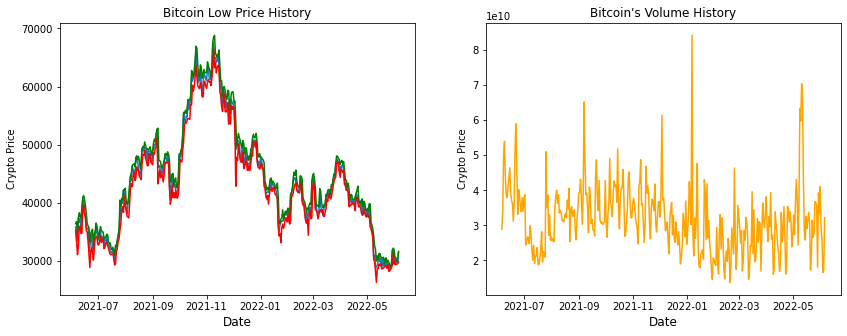

In [15]:
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(btc_df["date"], btc_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Crypto Price")
ax1.set_title("Bitcoin Close Price History")

# Second Subplot
ax1.plot(btc_df["date"], btc_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Crypto Price")
ax1.set_title("Bitcoin High Price History")

# Third Subplot
ax1.plot(btc_df["date"], btc_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Crypto Price")
ax1.set_title("Bitcoin Low Price History")

# Fourth Subplot
ax2.plot(btc_df["date"], btc_df["Volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Crypto Price")
ax2.set_title("Bitcoin's Volume History")
plt.show()

In [16]:
m = Prophet()

# Drop the columns
ph_df = btc_df.drop(['open', 'high', 'low','Volume', 'Ticks'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,2021-06-06,35862.37891
1,2021-06-07,33560.70703
2,2021-06-08,33472.63281
3,2021-06-09,37345.12109
4,2021-06-10,36702.59766


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


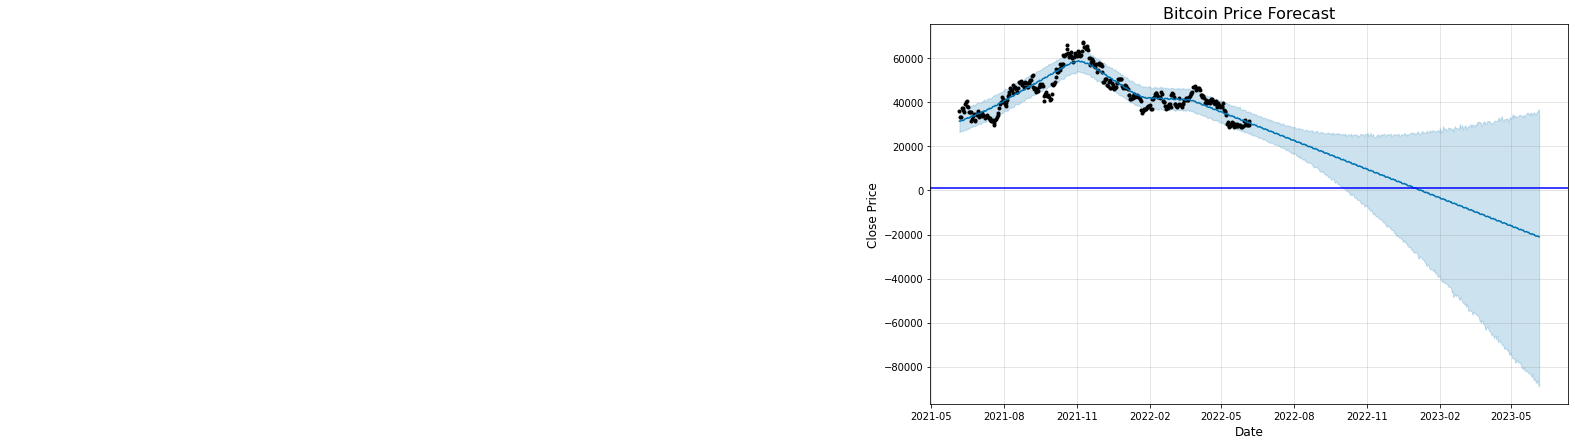

In [17]:
m = Prophet()
m.fit(ph_df)
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)

# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Bitcoin Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1350), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 1225), xytext=(trend_date1,950),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=1260, color='b', linestyle='-')

plt.show()

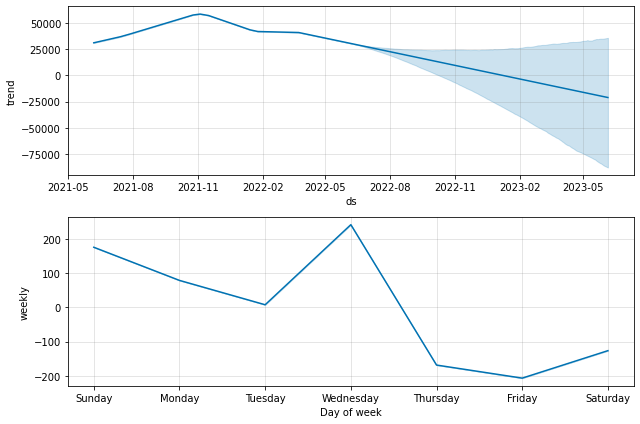

In [21]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


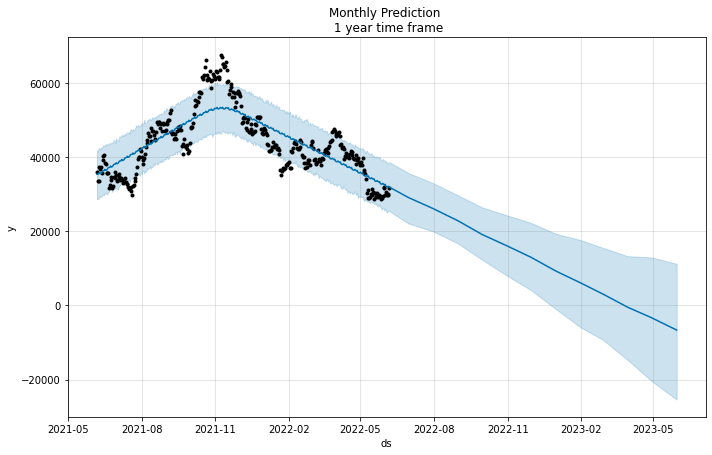

In [19]:
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()